### Title:
*Comparative Analysis of Ensemble Techniques: ADAboost, Gradient Boosting, XGBoost, and CatBoost*

### Introduction:
Ensemble learning involves combining the predictions of multiple base models to improve overall performance, robustness, and generalization. Four prominent ensemble techniques—ADAboost, Gradient Boosting, XGBoost, and CatBoost—have gained widespread use across various machine learning applications. This comparative analysis aims to elucidate the strengths and characteristics of each algorithm, aiding practitioners in selecting the most suitable ensemble method for their specific tasks.

### ADAboost (Adaptive Boosting):
*Method/Working:*
1. *Boosting Approach:*
   - ADAboost employs a boosting approach, where weak learners are sequentially trained to correct errors made by the previous ones.
   - It assigns weights to instances, emphasizing the misclassified ones in subsequent iterations.

2. *Weighted Voting:*
   - In each iteration, a weak learner is trained on the weighted dataset, and a weight is assigned to its prediction.
   - The final prediction is obtained through a weighted sum of the individual weak learners' predictions.

3. *Adaptation:*
   - ADAboost adapts by assigning higher weights to misclassified instances, forcing subsequent weak learners to focus on correcting these errors.
   - The final model combines the strengths of multiple weak learners to create a robust and accurate ensemble.

### Gradient Boosting:
*Method/Working:*
1. *Sequential Training:*
   - Gradient Boosting builds an ensemble by sequentially training weak learners.
   - Each learner corrects the errors of the previous one, optimizing a predefined loss function.

2. *Gradient Descent:*
   - The algorithm minimizes the loss function by adjusting the parameters of the weak learners using gradient descent.
   - The model combines multiple weak learners to create a strong predictive model.

3. *Shrinkage (Regularization):*
   - Gradient Boosting introduces shrinkage, a regularization technique that scales the contribution of each weak learner, preventing overfitting.

### XGBoost (Extreme Gradient Boosting):
*Method/Working:*
1. *Regularized Boosting:*
   - XGBoost extends traditional gradient boosting with additional features such as regularization terms to control model complexity.
   - It incorporates both tree-based models and linear models.

2. *Parallel Processing:*
   - XGBoost supports parallel processing, enhancing computational efficiency.
   - It efficiently handles missing data and provides options for tree pruning and regularization.

3. *Feature Importance:*
   - XGBoost allows the assessment of feature importance, aiding in feature selection and understanding model decisions.

### CatBoost (Categorical Boosting):
*Method/Working:*
1. *Categorical Feature Handling:*
   - CatBoost is designed to handle categorical features efficiently without the need for extensive preprocessing.
   - It internally encodes categorical variables, reducing the risk of information loss.

2. *Dynamic Tree Growing:*
   - CatBoost employs a dynamic tree-growth strategy, preventing overfitting by limiting the depth of individual trees.
   - It automatically finds an optimal number of iterations.

3. *Robust to Noisy Data:*
   - CatBoost is robust to noisy data and requires minimal hyperparameter tuning.
   - It performs well on diverse datasets and demonstrates competitive performance.



| Feature                         | ADAboost                        | Gradient Boosting               | XGBoost                         | CatBoost                        |
|---------------------------------|---------------------------------|---------------------------------|---------------------------------|---------------------------------|
| *Boosting Approach*           | Sequential                     | Sequential                     | Sequential                     | Sequential                     |
| *Weighted Voting*             | Yes                             | No                              | Yes                             | Yes                             |
| *Adaptation*                  | Emphasizes misclassified       | Minimizes loss through gradient| Regularization and shrinkage    | Handles categorical features   |
| *Sequential Training*         | Yes                             | Yes                             | Yes                             | Yes                             |
| *Gradient Descent*            | No                              | Yes                             | Yes                             | Yes                             |
| *Shrinkage (Regularization)*  | No                              | Yes                             | Yes                             | Yes                             |
| *Regularized Boosting*        | No                              | No                              | Yes                             | No                              |
| *Parallel Processing*         | No                              | No                              | Yes                             | No                              |
| *Feature Importance*          | No                              | No                              | Yes                             | No                              |
| *Categorical Feature Handling*| No                              | No                              | No                              | Yes                             |
| *Dynamic Tree Growing*        | No                              | No                              | No                              | Yes                             |
| *Robust to Noisy Data*        | No                              | No                              | Yes                             | Yes                             |
| *Minimal Hyperparameter Tuning*| Yes                           | Yes                             | No                              | Yes                             |

In [ ]:
pip install catboost


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
import pandas as pd


In [ ]:
from sklearn.datasets import load_digits
data = load_digits()  # Load the digits dataset as an example
X, y = data.data, data.target  # Extract features and target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
adaboost = AdaBoostClassifier()
gradient_boost = GradientBoostingClassifier()
xgboost = XGBClassifier()
catboost = CatBoostClassifier(verbose=False)

In [ ]:
adaboost.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
catboost.fit(X_train, y_train)

In [ ]:
adaboost_pred = adaboost.predict(X_test)
gb_pred = gradient_boost.predict(X_test)
xgb_pred = xgboost.predict(X_test)
catboost_pred = catboost.predict(X_test)

In [ ]:
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("CatBoost Accuracy:", accuracy_score(y_test, catboost_pred))

AdaBoost Accuracy: 0.21944444444444444
Gradient Boosting Accuracy: 0.9722222222222222
XGBoost Accuracy: 0.9694444444444444
CatBoost Accuracy: 0.9833333333333333


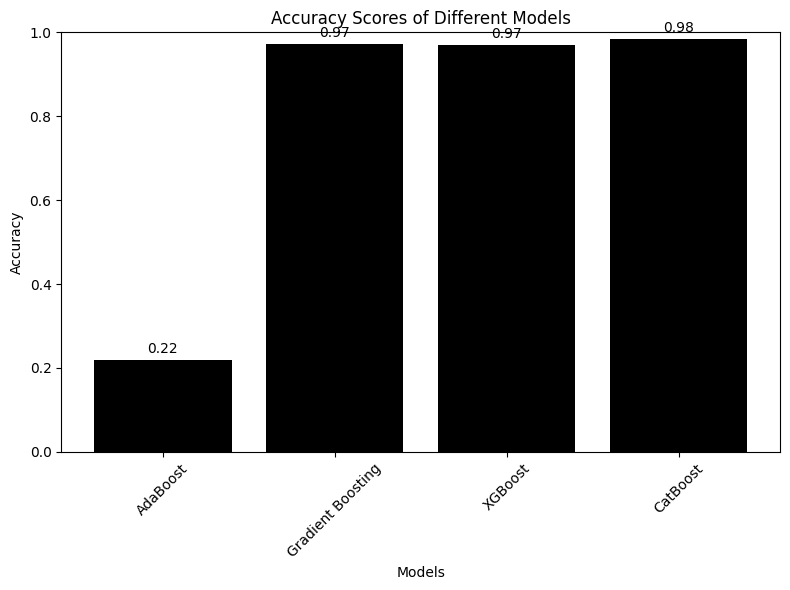

In [ ]:
import matplotlib.pyplot as plt

# ... (existing code for loading data and training models)

# Get accuracy scores
accuracy_scores = [
    accuracy_score(y_test, adaboost_pred),
    accuracy_score(y_test, gb_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, catboost_pred)
]

models = ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'CatBoost']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color='black')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()
